# Project 6: Visualizing Monetary Policy

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot:xlabel='DATE'>

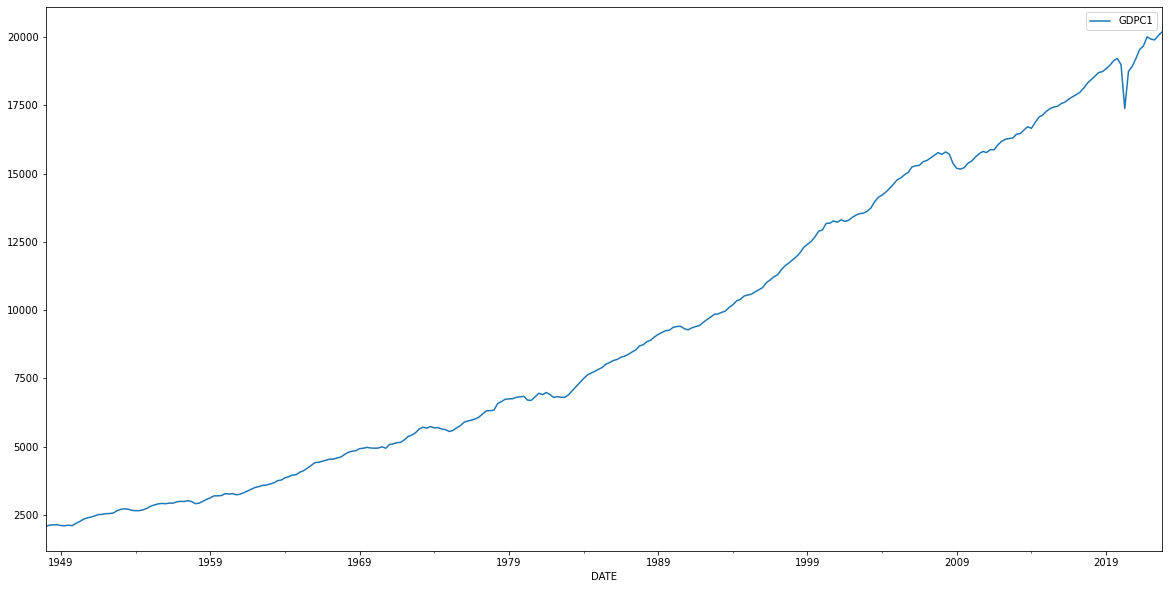

In [2]:
df.plot.line(figsize = (20,10))

In [3]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()  
            df.rename(columns  = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    
    return df

In [4]:
data_codes = {"Base: Total":"BOGMBASEW",
             "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

In [5]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [6]:
data.iloc[-52:]

,Base: Total,Base: Currency in Circulation
DATE,,
2019-09-22,3159026.0,1762096.0
2019-09-29,3159026.0,1761662.0
2019-10-06,3252373.0,1762796.0
2019-10-13,3252373.0,1766295.0
2019-10-20,3235853.0,1770761.0
2019-10-27,3235853.0,1771533.0
2019-11-03,3282965.0,1776039.0
2019-11-10,3282965.0,1782249.0
2019-11-17,3311715.0,1786866.0


<AxesSubplot:xlabel='DATE'>

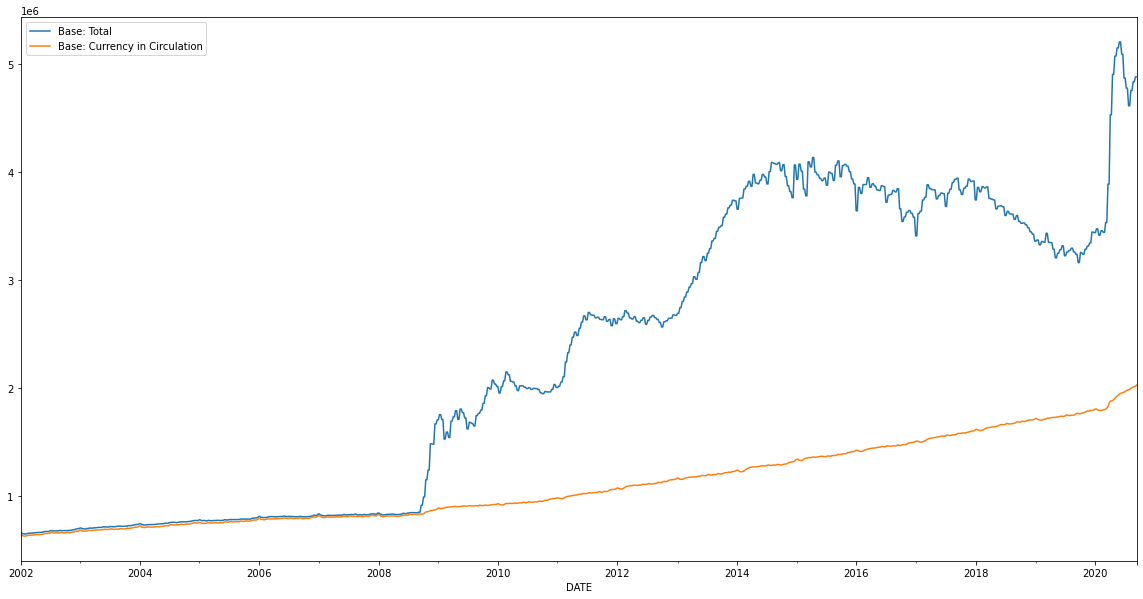

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))
data.plot.line(ax = ax)

<AxesSubplot:xlabel='DATE'>

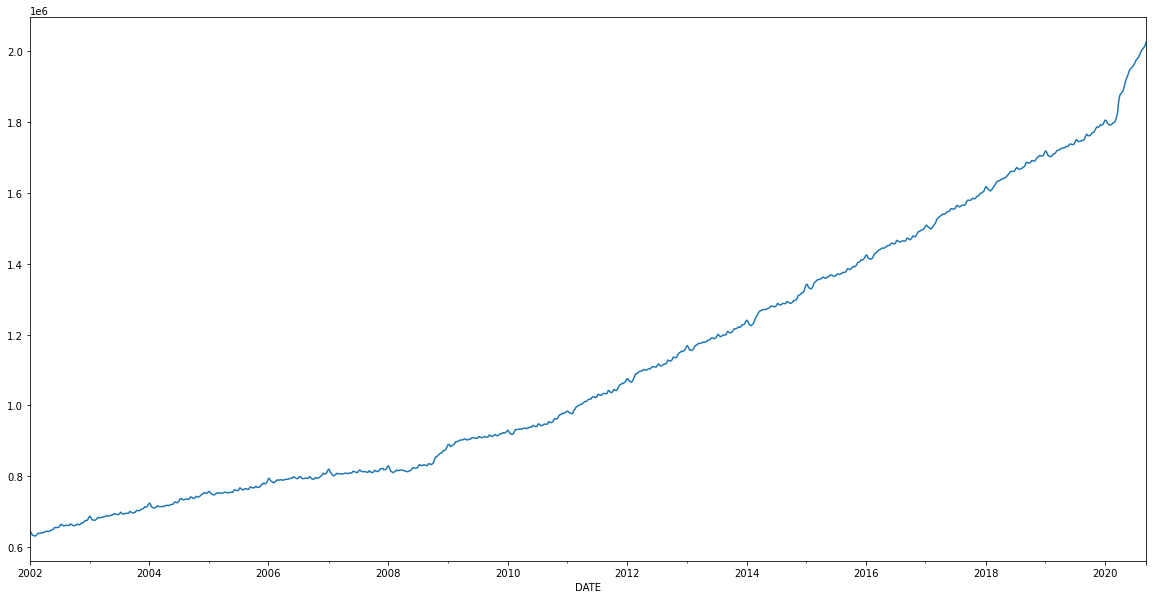

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))
data["Base: Currency in Circulation"].plot.line(ax = ax)

In [9]:
#FRED.py
#. . . 
def bil_to_mil(series):
    return series* 10**3

In [23]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
# data = gather_data(data_codes = data_codes,
#                  start = start,
#                  end = end,
#                  freq = "M")
data = pd.read_csv("MonetaryData.csv", index_col = [0])

In [11]:
# save data as a csv
data.to_csv("MonetaryData.csv")

### Merging two data sets, interest on reserves at Fed, with one one overlapping date

In [12]:
# A single day gets counted twice, so this is how you determine when that day is
# plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
# plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]

In [43]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match_date = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]].index
# sum the interest rate data sets
plot_data = plot_data.fillna(0)
plot_data.sum(axis = 1)
plot_data.loc[match_date] = 0.15

<AxesSubplot:xlabel='DATE'>

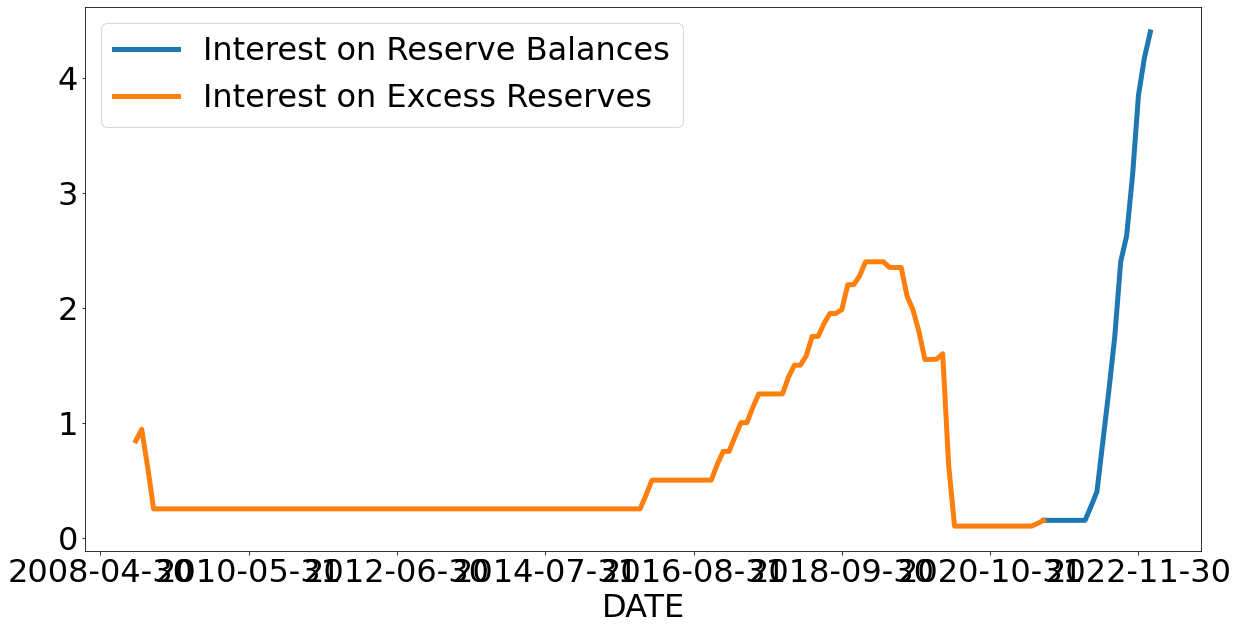

In [24]:
fig, ax =plt.subplots(figsize = (20, 10))
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]

plot_data.plot.line(ax = ax, linewidth = 5)

# data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
#    data["Interest on Reserve Balances"])

In [15]:
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]].plot()

ValueError: Columns must be same length as key

## Building Function to Plot Lines of data in dataframe

C:\Users\Owner\AppData\Local\Temp/ipykernel_3004/949421219.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


AttributeError: 'AxesSubplot' object has no attribute 'set_yticklables'

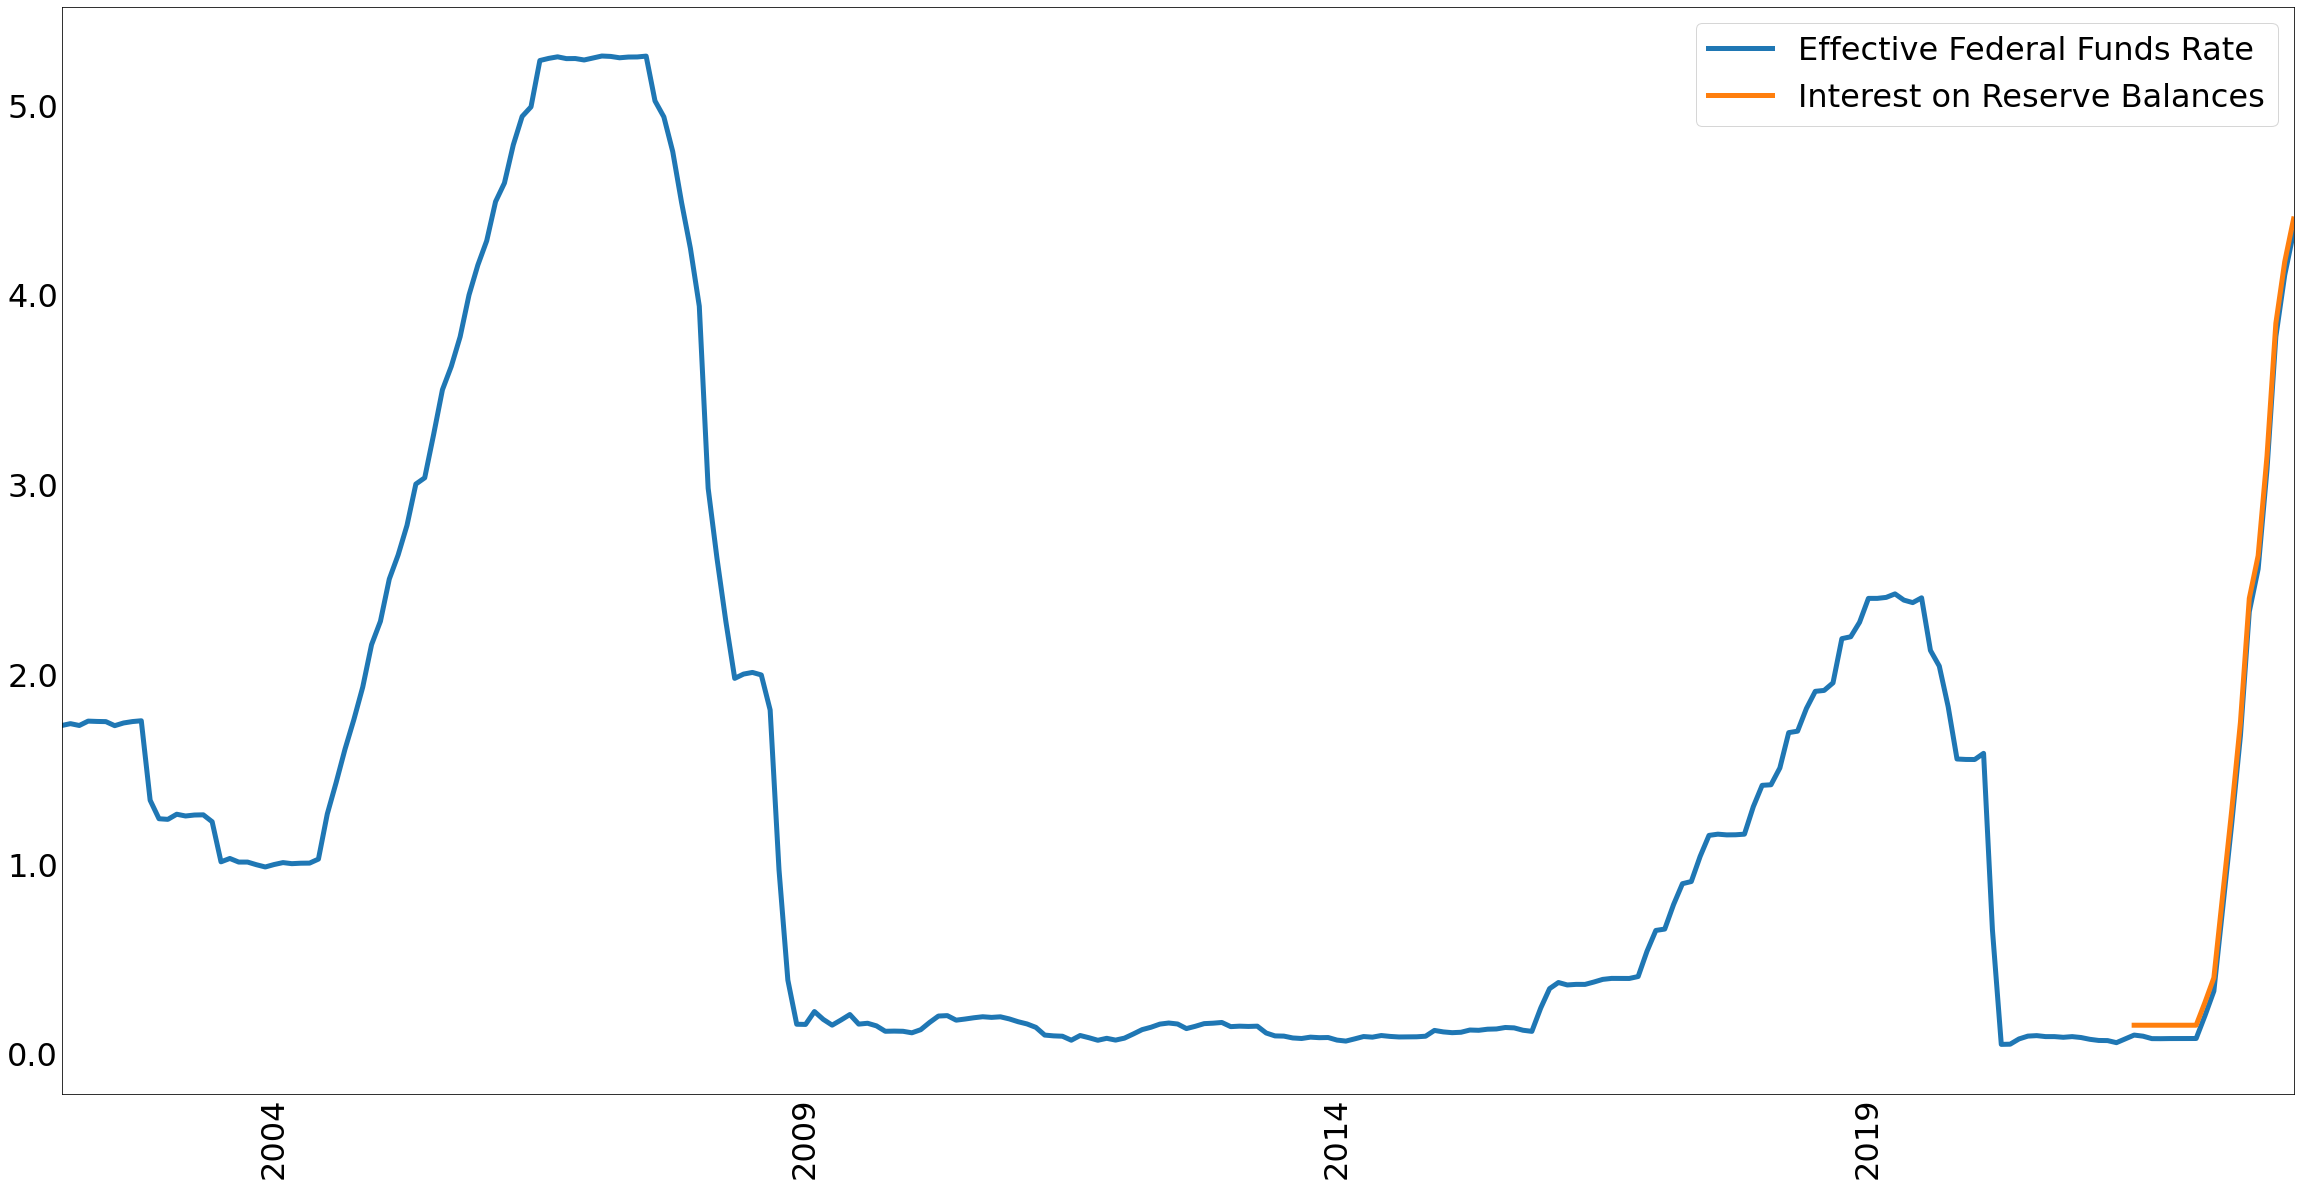

In [16]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = True,
              global_fontsize = 32):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = 'both')
    # round axis tick values 
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
   
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        folder = "Monetary Plots"
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + "line.png",
                   bbox_inches = "tight")
    
    
    return fig, ax

plot_data = data[["Effective Federal Funds Rate",
                          "Interest on Reserve Balances"]]
fig, ax = plot_lines(plot_data)

ax.set_yticklables([str(y) + "%" for y in ax.get_yticks()])

## Monetary Base

In [17]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(10 ** 3)

In [18]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]

plot_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Excess Reserves ($ Mil)
DATE,,,
2002-01-31,653800.0,635429.00,1446.20
2002-02-28,654600.0,635884.00,1377.25
2002-03-31,659000.0,639697.50,1370.25
2002-04-30,663400.0,643579.50,1263.50
2002-05-31,668600.0,648293.20,1256.20
...,...,...,...
2022-09-30,5410900.0,2279946.25,NaN
2022-10-31,5339600.0,2283799.00,NaN
2022-11-30,5418700.0,2291416.00,NaN


C:\Users\Owner\AppData\Local\Temp/ipykernel_3004/949421219.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 2880x1440 with 1 Axes>, <AxesSubplot:>)

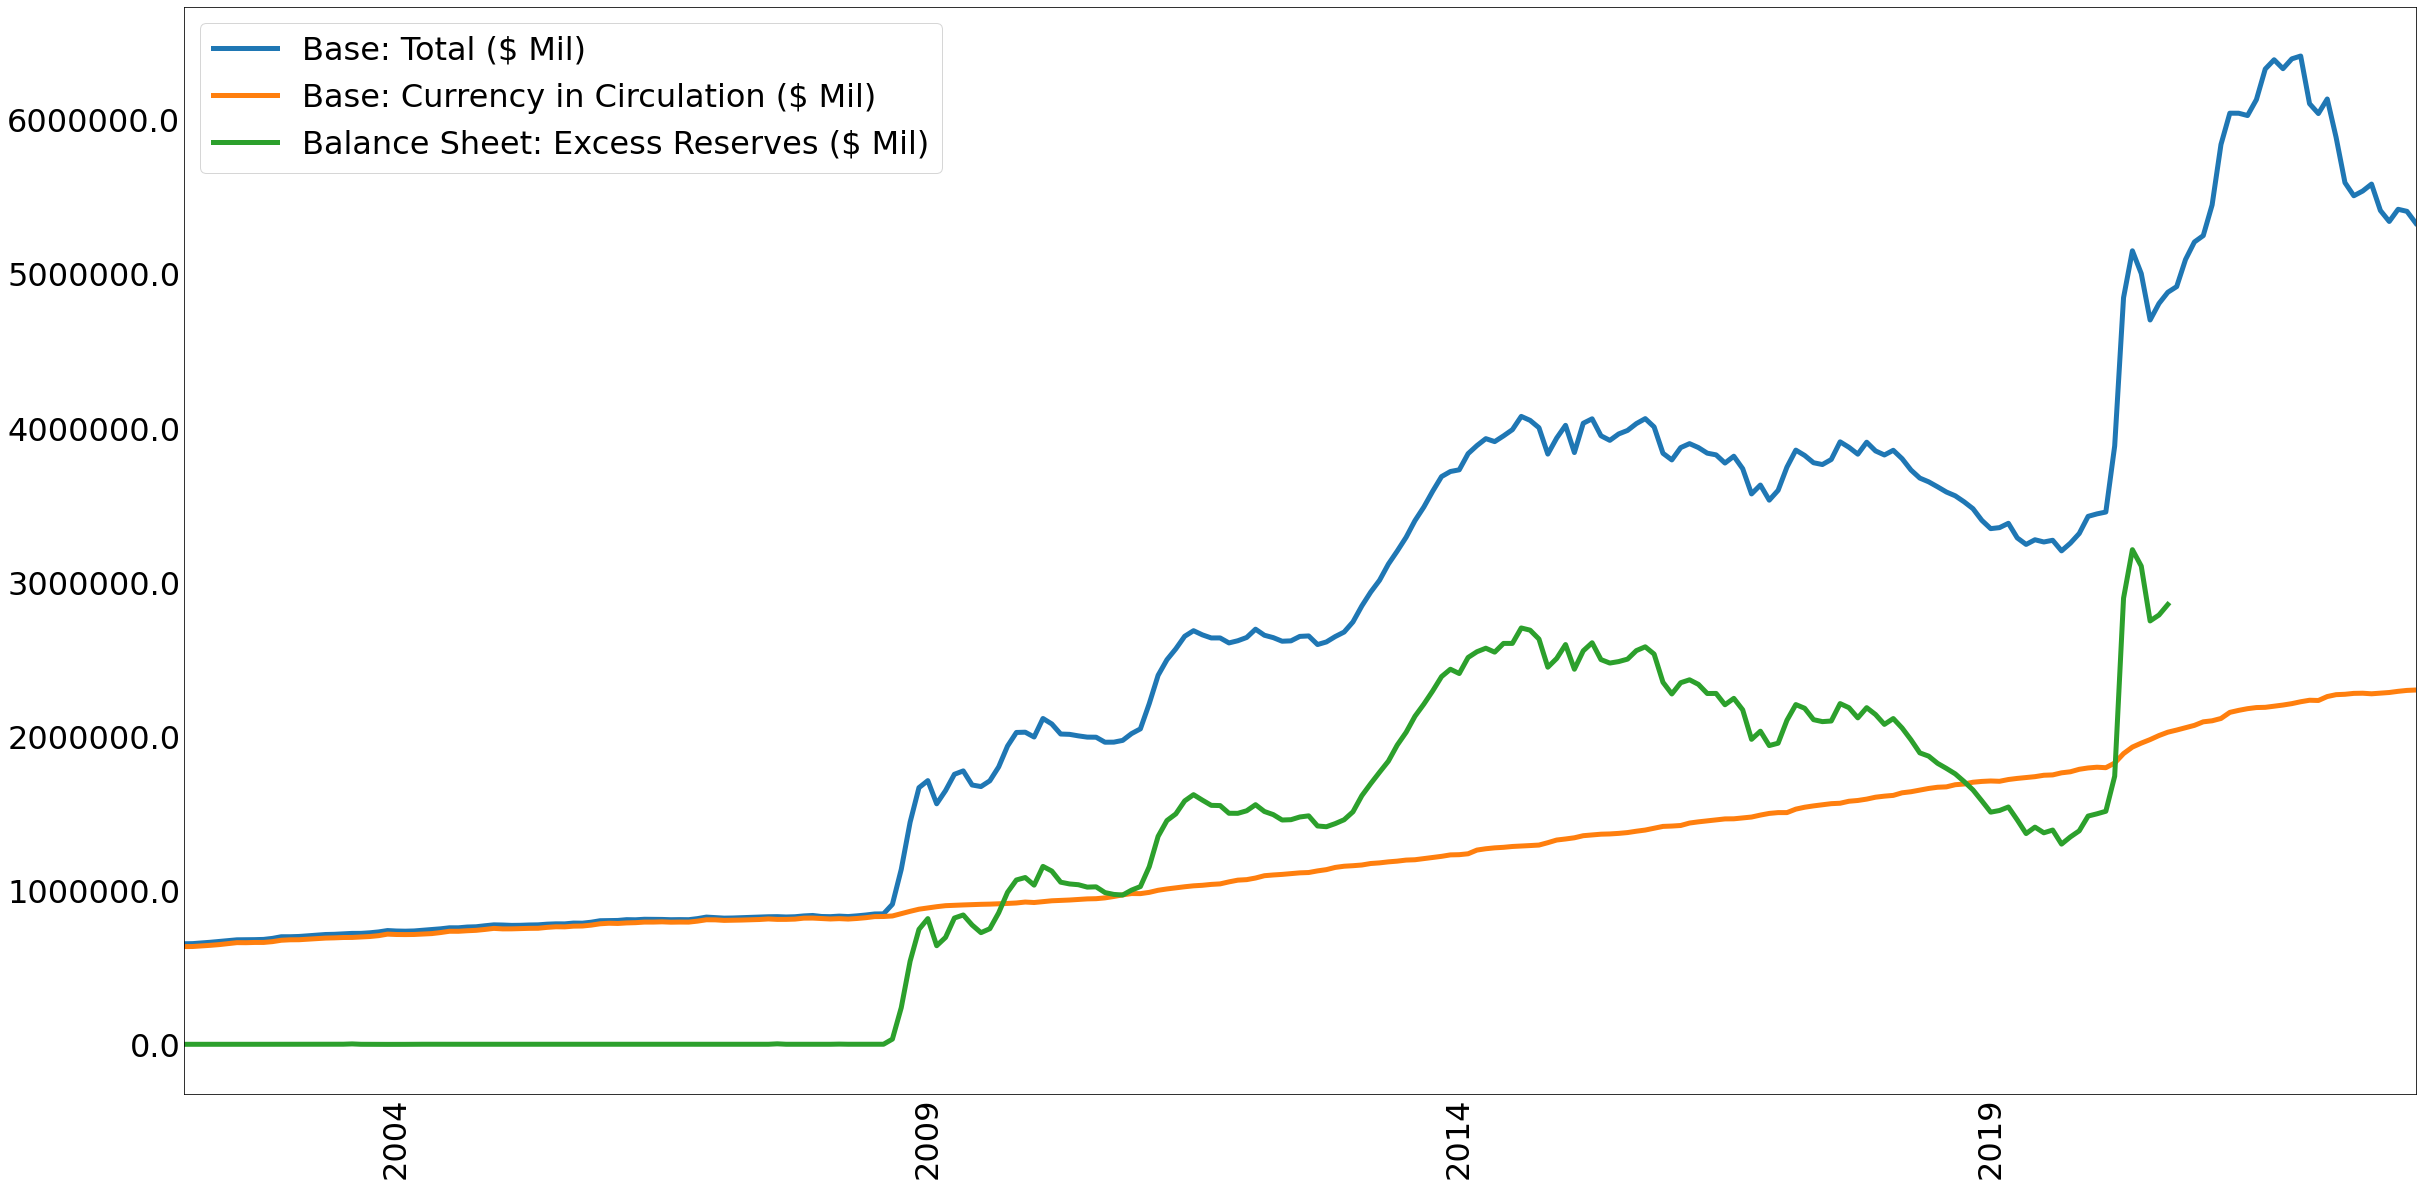

In [19]:
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)

### Stacked Lines

In [37]:
def plot_stacked(df,
                stack_vars,
                linewidth = 3,
                figsize = (40, 20),
                total_var = False,
                global_fontsize = 42
                ):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth,
             ax = ax
             color = "k",
             label = total_var,
             ls = "--")
    ax.legend(loc = 2, ncol = ncol)
    plt.xticks(rotation = 90)
            # bbox_to_anchor = (0,1))
    
    area_df = df[stack_vars]
    print(area_df.dtypes)
    area_df.plot.area(stacked = True,
                  linewidth = 0,
                  ax = ax)    
    return fig, ax

stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data,
                       stack_vars = stack_vars, 
                       total_var = total_var)

SyntaxError: invalid syntax (Temp/ipykernel_3004/2060238561.py, line 14)

In [28]:
# money_vars.append("Balance Sheet: Required Reserves ($ Mil)")
money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

In [29]:
stack_vars = money_vars[1:]

fig, ax = plot_stacked(df = data,
                       stack_vars = stack_vars, 
                       total_var = total_var)

NameError: name 'plot_stacked' is not defined

C:\Users\Owner\AppData\Local\Temp/ipykernel_3004/949421219.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


FileNotFoundError: [Errno 2] No such file or directory: 'Monetary Plots/Reserves / Currency in Circulationline.png'

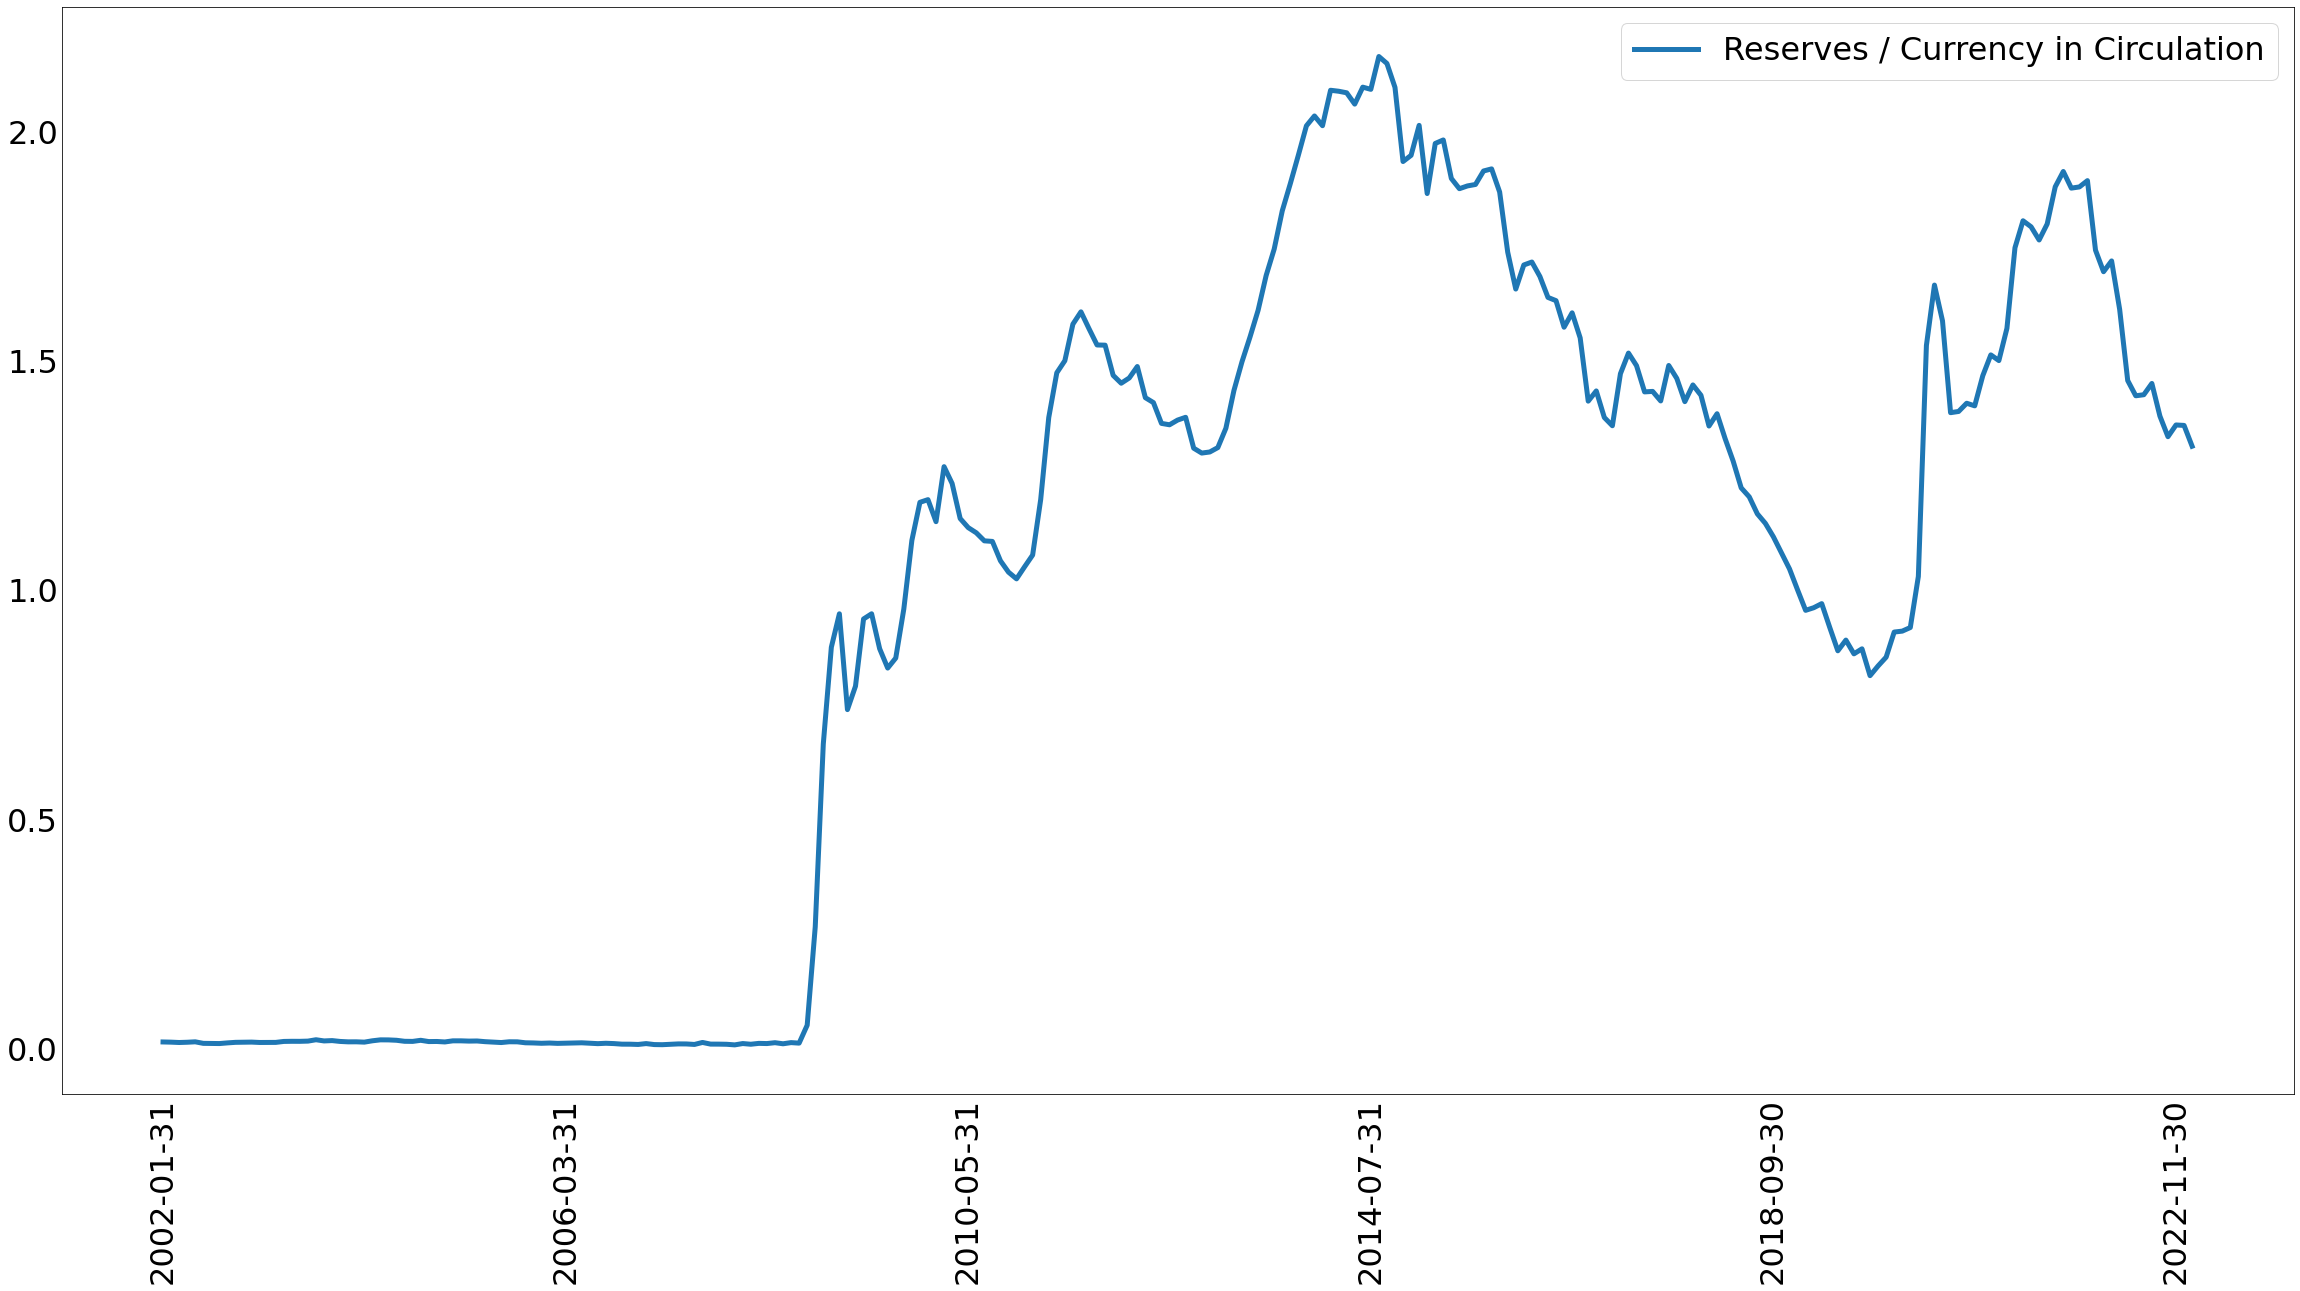

In [32]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df = data[reserve_vars]
fig, ax = plot_lines(plot_df)

In [34]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_data = data[reserve_vars]
plot_stacked(plot_data, reserve_vars)

NameError: name 'plot_stacked' is not defined

## Assests

In [35]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stacked_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars]
plot_data.dropna()

,Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil)
DATE,,,
2002-12-31,629399.50,10.0,0.00
2003-01-31,629406.00,10.0,0.00
2003-02-28,631901.75,10.0,0.00
2003-03-31,639158.25,10.0,0.00
2003-04-30,645498.60,10.0,0.00
...,...,...,...
2022-09-30,5680889.50,2347.0,2710215.50
2022-10-31,5621114.50,2347.0,2693371.50
2022-11-30,5547311.00,2347.0,2672953.40


In [38]:
fig, ax = plot_stacked(plot_data, account_vars)
ax.avxline("2007-08-01", ls = "--", color = "k", linewidth = 5, alpha = .5)
ax.avxline("2008-10-01", ls = "--", color = "k", linewidth = 5, alpha = .5)

NameError: name 'plot_stacked' is not defined

In [39]:
# from securities to remaining assets
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]
plot_data = data[account_vars]
stacked_vars = account_vars[1:]
total_var = account_vars[0]
plot_stacked(df = plot_data,
            linewidth = 5,
            stacked_vars = stacked_vars,
            total_var = total_var,
            )

NameError: name 'plot_stacked' is not defined

## Liabilities

In [42]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_var[0]
plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

NameError: name 'account_var' is not defined

In [41]:
account_vars = data["Base: Total ($ Mil)",
                   "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                   "Balance Sheet: Total Reserves ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_var[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

KeyError: ('Base: Total ($ Mil)', 'Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)', 'Balance Sheet: Total Reserves ($ Mil)')